# Problem Statement


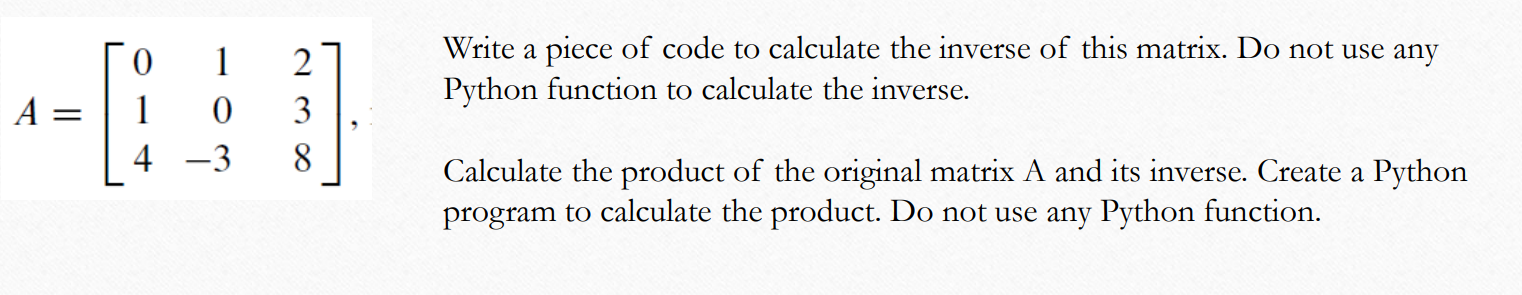

# Solution

**Steps to solve the problem:**

**1.Define a function to convert a matrix into Reduced Row Echelon Form:**
- The function row_echelon_form(matrix) takes a matrix as input and returns its RREF
- It initializes a copy of the input matrix and sets the leading variable lead_var to 0
- It iterates over the rows of the matrix
- Within each iteration, it finds the non-zero element in the current column (if any) and brings it to the diagonal by swapping rows
- It makes the diagonal element 1 by dividing the row by the lead element
- It makes the non-diagonal elements of the current column 0 by performing row operations
- It moves to the next column if row operations in the current column are done

**2.Define matrix multiplication function to verify the inverse:**
- The function matrix_mul(matrix, inv_matrix) takes two matrices as input and returns their product
- It initializes the result matrix with appropriate dimensions
- It iterates over the rows and columns of the matrices and computes the product element-wise
- It accumulates the result in the result matrix


In [47]:
#define a function to convert matrix into rref
def row_echelon_form(matrix):
    matrix_copy = [row[:] for row in matrix]

    #set leading variable to 0
    lead_var=0

    #find the rows and columns in a matrix
    rows=len(matrix)
    columns=len(matrix[0])

    #iterate over no.of rows in a matrix
    for r in range(rows):

        #if the leading variable is greater than the columns in a matrix, stop iteration
        if lead_var>=columns:
            break
        i=r
        
        #find the non-zero element in the current column
        while matrix[i][lead_var]==0:
            i+=1

            #if we reach the end of the row in current column, go to current row and to next column
            if i==rows:
                i=r
                lead_var+=1

                #if we processed all columns, stop iteration, the matrix is already in RREF 
                if columns==lead_var:
                    break

        #bring leading element to the diagonal by swapping rows
        matrix[i],matrix[r]= matrix[r],matrix[i]

        #find leading element
        lead_element=matrix[r][lead_var]
    
        #make diagonal element to 1
        if lead_element!=0:
            matrix[r]=[element/float(lead_element) for element in matrix[r]]

        #make non diagonal elements to 0
        for i in range(rows):
            if i != r:
                lead_element=matrix[i][lead_var]
                matrix[i] = [iv - lead_element*rv for rv, iv in zip(matrix[r], matrix[i])]
            
        #move to next column if row operations in current column are done   
        lead_var += 1
    return matrix

In [75]:
#define matrix multiplication to verify the inverse of the matrix
def matrix_mul(matrix, inv_matrix):

    result=[[0]*len(inv_matrix[0]) for _ in range(len(matrix))]
    for i in range(len(matrix)):
        for j in range(len(inv_matrix[0])):
            for k in range(len(inv_matrix)):
                result[i][j] += matrix[i][k]*inv_matrix[k][j]
    return result
    

In [80]:
#define matrix A
A=[[0,1,2],
   [1,0,3],
   [4,-3,8]]
#define identity matrix I
I=[[1,0,0],
   [0,1,0],
   [0,0,1]]

#creating augmented matrix
augmented_matrix=[row_A + row_I for row_A , row_I in zip(A,I)]

#function call to convert augmented matrix into row echelon form
row_echelon_form(augmented_matrix)

#extracting right side of the matrix
inverse_A = [row[len(row)//2:] for row in augmented_matrix]
print(inverse_A)

print("Product of matrix A:",A,"and it's inverse:",inverse_A,"is:\n",matrix_mul(A,inverse_A))

[[-4.5, 7.0, -1.5], [-2.0, 4.0, -1.0], [1.5, -2.0, 0.5]]
Product of matrix A: [[0, 1, 2], [1, 0, 3], [4, -3, 8]] and it's inverse: [[-4.5, 7.0, -1.5], [-2.0, 4.0, -1.0], [1.5, -2.0, 0.5]] is:
 [[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0]]
